In [7]:
import librosa as lr
import numpy as np
import scipy.signal as signal
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.io import wavfile
import IPython.display as ipd

In [8]:
filepath = 'C:\\Users\\chorj\\Downloads\\WavFiles'
input_file1 = filepath + '\\Hercules_dry_Drums_Kick.wav'
input_file2 = filepath + '\\Hercules_dry_Drums_Loop.wav'

# Read the wav file 
samplerate1, data1 = wavfile.read(input_file1)
samplerate2, data2 = wavfile.read(input_file2)
print('Sampling rate = ', samplerate1)
dt1, sr1 = lr.load(input_file1, sr = samplerate1)
dt2, sr2 = lr.load(input_file2, sr = samplerate2)


C:\Users\chorj\AppData\Local\Temp\ipykernel_43352\4167989557.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate1, data1 = wavfile.read(input_file1)
C:\Users\chorj\AppData\Local\Temp\ipykernel_43352\4167989557.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplerate2, data2 = wavfile.read(input_file2)


Sampling rate =  44100


In [9]:
#200000~400000 부분의 샘플만을 가져옵니다
sample1 = data1[250000:850000]
sample2 = data2[250000:850000]
#sample = data[1000000:1500000] : for consecutive data
s1 = dt1[250000:850000]
s2 = dt2[250000:850000]




In [10]:
def plot_waveform(sample, isLibrosa = False):

    plt.figure(figsize=(12, 4))
    if isLibrosa:
        plt.plot(sample, label="Combined Audio Waveform")
    else:
        plt.plot(np.mean(sample, axis=1), label="Combined Audio Waveform")
    plt.title("Stereo Audio Waveform")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()


def plot_spectrogram(sample, sample_rate, title="Spectrogram", size=(12, 4)):
    plt.figure(figsize=size)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.show()

def plot_waveform_withBounds(sample, non_silent_segments , isLibrosa = False):
    plt.figure(figsize=(12, 4))
    if isLibrosa:
        plt.plot(sample, label="Combined Audio Waveform")
    else:
        plt.plot(np.mean(sample, axis=1), label="Combined Audio Waveform")
    for start, end in non_silent_segments:
        plt.axvline(x=start, color='green', linestyle='--', label="Segment Start")
        plt.axvline(x=end, color='red', linestyle='--', label="Segment End")
        #print(f"Non-silent segment: Start = {start}, End = {end}")

    plt.title("Stereo Audio with Non-Silent Segments")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    #plt.legend()
    plt.show()



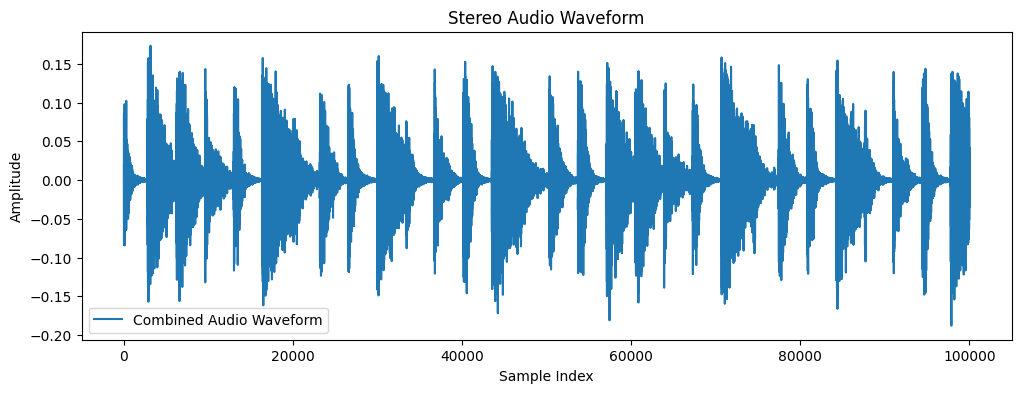

In [11]:

plot_waveform(s2[100000:200000], isLibrosa=True)

s3 = s2[100000:200000]


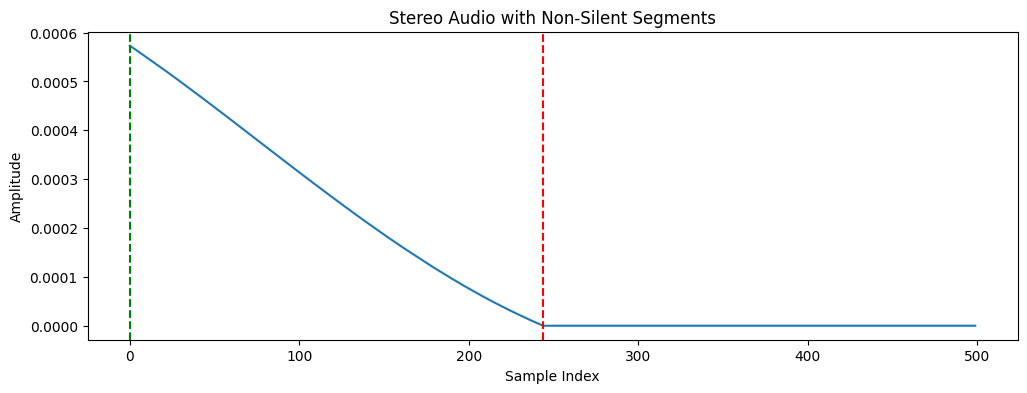

In [12]:
def has_consecutive_zeros(data, startindex, silence_threshold, window):
    if silence_threshold != 0:
        for i in range(window):
            if abs(data[startindex+i]) < 0:
                return False
        return True
    else:
        for i in range(window):
            if data[startindex+i] != 0:
                return False
        return True        

def find_blocks(data, silence_threshold = 0, window = 20, isLibrosa = False):

    # Calculate the minimum length for a segment based on minimum duration
    if isLibrosa:
        combined_data = data
    else:
        combined_data = np.mean(data, axis=1)
    # Initialize variables
    segments = []
    start_index = None

    # Iterate over the combined audio data
    for i, sample in enumerate(combined_data):
        if start_index is None: #and len(combined_data) - i > window: #edge case
            if combined_data[i] != 0: #if the sample is not 0
                start_index = i
        else: # if start index is not none
            if combined_data[i] == 0: #if the sample is 0
                if window > (len(combined_data) - start_index) or \
                has_consecutive_zeros(combined_data, i, silence_threshold, window): #check consecutive zeros
                    segments.append((start_index, i))
                    start_index = None

    # Check for the last segment
    if start_index is not None and len(combined_data) - start_index > window:
        segments.append((start_index, len(combined_data) - 20))

    return segments


# Define the silence threshold
silence_threshold = 0  # Adjust this based on your audio

# Find non-silent segments
#blocks1 = find_blocks(s1,  isLibrosa = True)
blocks2 = find_blocks(dt1[263000:263500], isLibrosa = True)
#plot_waveform_withBounds(s1, blocks1, isLibrosa = True)
plot_waveform_withBounds(dt1[263000:263500], blocks2, isLibrosa = True)


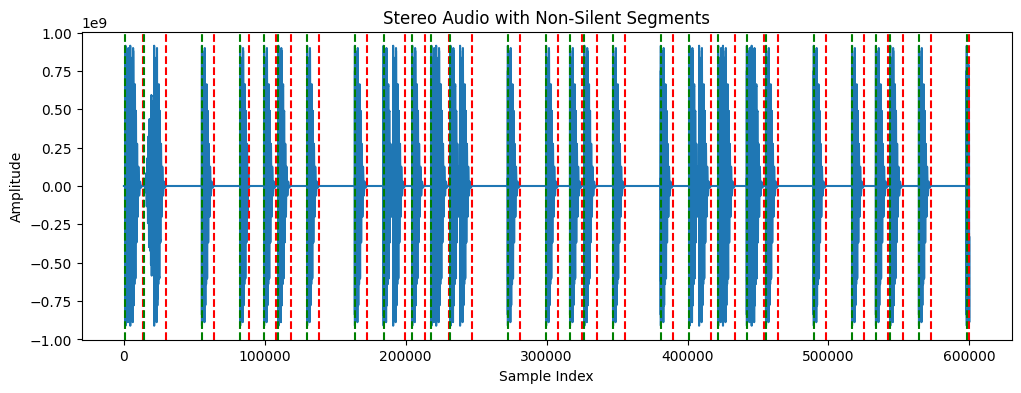

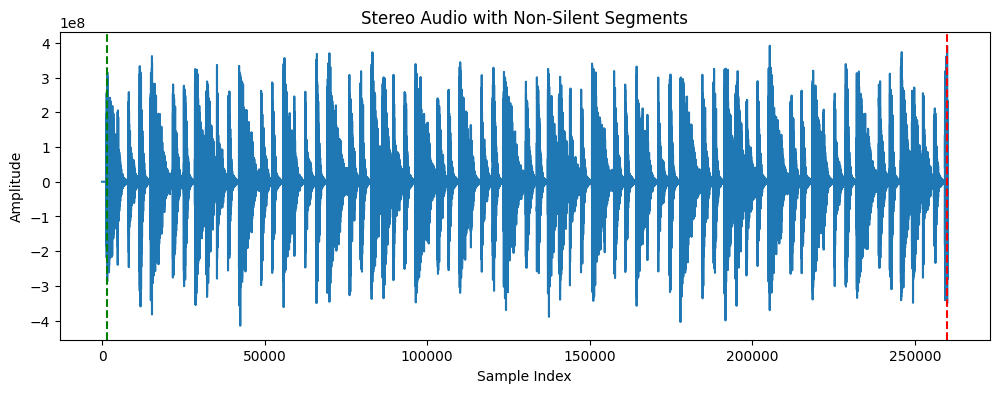

In [13]:
non_silent_segments1 = find_blocks(sample1)
non_silent_segments2 = find_blocks(sample2[20000:280000])
plot_waveform_withBounds(sample1, non_silent_segments1)
plot_waveform_withBounds(sample2[20000:280000], non_silent_segments2)

In [14]:
print('Number of non-silent segments = ', len(non_silent_segments1))
for i in range(len(non_silent_segments1)):
    print('Non-silent segment ', i+1, ' = ', non_silent_segments1[i], "duration: " + str((non_silent_segments1[i][1] - non_silent_segments1[i][0])))

Number of non-silent segments =  28
Non-silent segment  1  =  (1032, 13244) duration: 12212
Non-silent segment  2  =  (14600, 30206) duration: 15606
Non-silent segment  3  =  (55309, 64129) duration: 8820
Non-silent segment  4  =  (82447, 89014) duration: 6567
Non-silent segment  5  =  (99409, 108229) duration: 8820
Non-silent segment  6  =  (109586, 118406) duration: 8820
Non-silent segment  7  =  (129939, 138759) duration: 8820
Non-silent segment  8  =  (163863, 172683) duration: 8820
Non-silent segment  9  =  (184216, 199821) duration: 15605
Non-silent segment  10  =  (204570, 213390) duration: 8820
Non-silent segment  11  =  (218139, 230352) duration: 12213
Non-silent segment  12  =  (231709, 247313) duration: 15604
Non-silent segment  13  =  (272416, 281236) duration: 8820
Non-silent segment  14  =  (299555, 308375) duration: 8820
Non-silent segment  15  =  (316516, 325336) duration: 8820
Non-silent segment  16  =  (326693, 335513) duration: 8820
Non-silent segment  17  =  (347047

In [44]:
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity

#두 audio segment가 완벽히 일치하는지를 확인
def compare_exact(wav1, wav2, isLibrosa = False):
    if isLibrosa:
        for i in range(len(wav1)):
            if wav1[i] != wav2[i]:
                return False
    else:
        for i in range(len(wav1)):
            if wav1[i][0] != wav2[i][0] or wav1[i][1] != wav2[i][1]:
                return False
    return True


#두 audio segment의 길이를 같게 함
def match_list(listA, listB):
    if len(listA) > len(listB):
        listA = listA[:len(listB)]
    elif len(listA) < len(listB):
        listB = listB[:len(listA)]
    return listA, listB

#window_size(아마 10정도)로 해당 리스트의 값을 blur 함
def blur_list(target, window_size):
    return [np.mean(target[i:i+window_size]) for i in range(len(target) - window_size)]

def get_cosine_similarity(listA, listB):
    similarity = cosine_similarity([listA], [listB])
    return similarity[0][0]

#cosine similarity의 계산. 길이가 다른 경우도 고려함.
def compare_similar(listOrigin, listNew, isLibrosa = False):
    listA, listB = match_list(listOrigin, listNew)
    if isLibrosa:
        listA = listOrigin
        listB = listNew
    else:
        listA = np.mean(listOrigin, axis=1)
        listB = np.mean(listNew, axis=1)
    if len(listA) > 10 and len(listB) > 10:
        listA = blur_list(listA, 10)
        listB = blur_list(listB, 10)
    
    return get_cosine_similarity(listA, listB)

#compare_spectrogram의 하위 function
def get_spectrogram(data):
    spectrogram = np.abs(lr.stft(data))
    return spectrogram

#두 audio segment의 spectrogram을 형성 후 cosine similarity를 계산합니다.
def compare_spectrogram(data1, data2):
    dt1, dt2 = match_list(data1, data2)
    spectrogram1 = get_spectrogram(dt1)
    spectrogram2 = get_spectrogram(dt2)
    # Flatten the spectrogram data
    flat_spec1 = spectrogram1.flatten()
    flat_spec2 = spectrogram2.flatten()

    # Compute cosine similarity (1 - cosine distance)
    similarity = 1-cosine(flat_spec1, flat_spec2)
    return similarity




In [45]:


def checkSimilarity(wav1, wav2):
    length = len(wav1)
    difflength = 0
    diffratio = 0
    for i in range(len(wav1)):
        if wav1[i][0] != wav2[i][0] or wav1[i][1] != wav2[i][1]:
            difflength += 1
            diffratio += (wav2[i][1]/wav1[i][1] + wav2[i][1]/wav1[i][0])/2
            if difflength < 2:
                print("Different sample: wav1: " + str(wav1[i][0]) +"/" + str(wav1[i][1]) 
                + ", wav2: " + str(wav2[i][0]) + "/"+ str(wav2[i][1]))
    
    evaluation = diffratio / difflength * 100
    diffportion = difflength 
    print("Different samples: " + str(diffportion) + ", Evaluation: " + str(evaluation))

def checkDuplicate(wav, indexlist, duration):
    getfirst = True
    for i in range(len(indexlist)):
        startindex = indexlist[i][0]
        endindex = indexlist[i][1]
        if endindex - startindex == duration:
            if getfirst:
                Target = wav[startindex:endindex]
                getfirst = False
            else:
                writeme = compare_spectrogram(Target, wav[startindex:endindex])
                print("Comparing with the segment " + str(startindex) + " to " + str(endindex) + " duration= " + str(endindex - startindex) )
                if writeme > 0.9:                  
                    print("Duplicate Found, cosine similarity: " + str(writeme) )
                else: 
                    print("Not a Duplicate, cosine similarity: " + str(writeme))
                    #checkSimilarity(Target, wav[startindex:endindex])

checkDuplicate(s1, non_silent_segments1, 8820)

Comparing with the segment 99409 to 108229 duration= 8820
Duplicate Found, cosine similarity: 1
Comparing with the segment 109586 to 118406 duration= 8820
Duplicate Found, cosine similarity: 1
Comparing with the segment 129939 to 138759 duration= 8820
Duplicate Found, cosine similarity: 1
Comparing with the segment 163863 to 172683 duration= 8820
Duplicate Found, cosine similarity: 1
Comparing with the segment 204570 to 213390 duration= 8820
Duplicate Found, cosine similarity: 1
Comparing with the segment 272416 to 281236 duration= 8820
Duplicate Found, cosine similarity: 1
Comparing with the segment 299555 to 308375 duration= 8820
Duplicate Found, cosine similarity: 1
Comparing with the segment 316516 to 325336 duration= 8820
Duplicate Found, cosine similarity: 1
Comparing with the segment 326693 to 335513 duration= 8820
Duplicate Found, cosine similarity: 1
Comparing with the segment 347047 to 355867 duration= 8820
Duplicate Found, cosine similarity: 1
Comparing with the segment 3809

In [17]:
def find_non_silent_segments(data, silence_threshold, min_duration=0.1):

# Calculate the minimum length for a segment based on minimum duration
    min_segment_length = min_duration

    # Combine stereo channels by averaging
    combined_data = np.mean(data, axis=1)

    # Initialize variables
    segments = []
    start_index = None

    # Iterate over the combined audio data
    for i, sample in enumerate(combined_data):
        if abs(sample) > silence_threshold:
            if start_index is None:
                start_index = i
        else:
            if start_index is not None and i - start_index > min_segment_length:
                segments.append((start_index, i))
                start_index = None

    # Check for the last segment
    if start_index is not None and len(combined_data) - start_index > min_segment_length:
        segments.append((start_index, len(combined_data)))

    return segments

In [18]:
def blur_list(target, window_size):
    return [np.mean(target[i:i+window_size]) for i in range(len(target) - window_size)]


blur_list([1,2,3,4,5,6,7], 3)

[2.0, 3.0, 4.0, 5.0]

In [19]:
dt1[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
a = [1,1,2,2,3,3]

b = [1,1,2,2,3,3.6]

compare_similar(a,b, isLibrosa=True)

0.996170927639888

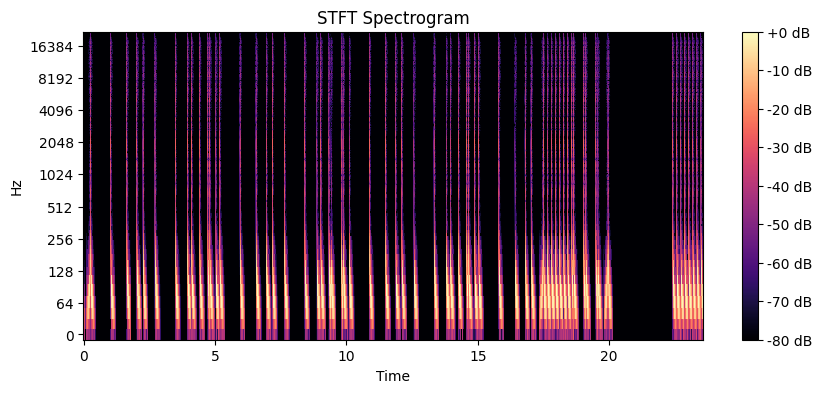

In [28]:

import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a Librosa array called 'audio'
# and a sample rate called 'sr'

# Compute the STFT spectrogram
def get_spectrogram(data):
    spectrogram = np.abs(lr.stft(data))
    return spectrogram


def show_spectrogram(spectrogram, samplerate):
    # Display the spectrogram
    plt.figure(figsize=(10, 4))
    lr.display.specshow(lr.amplitude_to_db(spectrogram, ref=np.max), sr=samplerate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT Spectrogram')
    plt.show()

show = get_spectrogram(dt1[260000:1300000])

show_spectrogram(show, samplerate1)

In [30]:
len(show[0])

2032

In [38]:
class Audiopackage:
    
    #indexlist = list of [start, end]
    #audio = audio data

    indexlist = []
    
    def __init__(audiofile, samplerate, parsetype = 'spectrogram'):
        audio, sr = lr.load(audiofile, sr = samplerate)
        self.audiosegmentlist = [] 
        self.audio = audio
        self.samplerate = sr
        self.audioIndex = find_non_silent_segments(audio, 1000, 0.001) 
        self.parsetype = parsetype
        if parsetype == "":

            parse(self.type)
        self.length = len(audio)
    
    def parse(self):
         for i in range(len(self.audioIndex)):
            if len(indexlist) == 0:
                indexlist.append([0, self.length])
            else:
                for i in range(len(indexlist)):
                    if self.parsetype == "exact":
                        if lengthExists(i) and compareExact() == True:
                            indexlist[i].append(audioIndex[i])
                    elif self.parsetype == "spectrogram":
                        if lengthSimilar(i) and compareSpectrogram() == True:
                            indexlist[i].append(audioIndex[i])


    def lengthExists(self, i):

        for i in range(len(indexlist)):
            for j in range(len(audioIndex)):
                if (audioIndex[j][1] - audioIndex[j][0]) in indexlist[i]:
                    return True

        return False
    def lengthSimilar(self, i):
        for i in range(len(indexlist)):
            for j in range(len(audioIndex)):
                if abs((audioIndex[j][1] - audioIndex[j][0] - indexlist[i])/indexlist[i]) < 0.1:
                    return True

    def compareExact(self):
        

        # indexlist[9].append(index)
            #compare length first
            #if length is same, then compare each sample
        #else indexlist.append(AudioSegment(audio, length, index))
        pass
    def parseSimilar(self):
        pass
    def parseSpectrogram(self):
        pass


    def print(self):
        for i in range (len(self.audiosegmentlist)):
            print(self.audiosegmentlist[i])
    def export(self):
        export = np.zeros(self.length)
        ##add all data iteratively
        return export

class AudioSegment:
    #처음 불릴때
    def __init__(self, audio, length, index, amplitude = 1):
        self.indexlist = [] 
        indexlist.append(index)
        self.length = length
        self.audio = audio
        self.amplitude = amplitude
    def __str__(self):
        return "SampleLength: " + str(self.length) + " , IndexList: " + str(self.indexlist)
    def append(self, index, amplitude = 1):
        #초기 샘플보다 후기 샘플이 더 adaptable 할 경우
        self.indexlist.append(index)

In [49]:
def find_non_zero_ratio(sample):
    count = 0
    for i in range(len(sample)):
        if sample[i][0] == 0 and sample[i][1] == 0:
            count += 1
    return round(1 - count/len(sample),4)

find_non_zero_ratio(sample1)

0.4642

In [ ]:
import soundfile as sf
import zipfile
import os
import time

def compare_compression_ratio(input_file):
    # Specify the output file paths
    flac_output_file = 'compressed.flac'
    zip_output_file = 'compressed.zip'

    # Read the WAV file
    data, samplerate = sf.read(input_file)

    start_time = time.time()
    # Write the FLAC file
    sf.write(flac_output_file, data, samplerate, format='flac')
    # time
    flac_time = time.time() - start_time

    start_time = time.time()
    # Create a new ZIP file
    with zipfile.ZipFile(zip_output_file, 'w', compression=zipfile.ZIP_DEFLATED) as zipf:
        # Add the WAV file to the ZIP file
        zipf.write(input_file, arcname='audio.wav')
    # time
    zip_time = time.time() - start_time

    # Get the file sizes
    input_size = os.path.getsize(input_file)
    flac_size = os.path.getsize(flac_output_file)
    zip_size = os.path.getsize(zip_output_file)

    # Calculate the compression ratios
    flac_ratio = flac_size / input_size
    zip_ratio = zip_size / input_size
    non_zero_ratio = find_non_zero_ratio(data)
    print("Ratio of non-zero: " + str(non_zero_ratio))
    # Print the results
    print(f"FLAC Compression Ratio: {flac_ratio:.4f}")
    print(f"ZIP Compression Ratio: {zip_ratio:.4f}")
    
    #TODO: print time

    # Delete the temporary files
    os.remove(flac_output_file)
    os.remove(zip_output_file)
    return [non_zero_ratio, flac_ratio, zip_ratio, flac_time, zip_time]


In [ ]:

compare_compression_ratio(input_file1)

Ratio of non-zero: 0.4512
FLAC Compression Ratio: 0.1391
ZIP Compression Ratio: 0.3661


[0.4512, 0.13914049406402765, 0.36612599549920144]

In [ ]:
compare_compression_ratio(input_file2)

Size of Zero: 0.66
FLAC Compression Ratio: 0.24
ZIP Compression Ratio: 0.59


In [ ]:
import glob

# Specify the folder path
folder_path = 'C:\\Users\\chorj\\Downloads\\WavFiles\\Hercules_Dry(AbelEdit)'

# Find all WAV files in the folder
wav_files = glob.glob(folder_path + '/*.wav')

# Print the list of WAV files
for file in wav_files:
    print(file)


In [ ]:
def analyze_folder(folder_path):
    # Find all WAV files in the folder
    wav_files = glob.glob(folder_path + '/*.wav')
    resultList = []
    # Print the list of WAV files
    for file in wav_files:
        print(file)
        resultList.append(compare_compression_ratio(file))
    return [resultList]


In [ ]:
resultList = analyze_folder(folder_path)    

C:\Users\chorj\Downloads\WavFiles\Hercules_Dry(AbelEdit)\Hercules_dry_Bass_BassTop.wav
Ratio of non-zero: 0.73
FLAC Compression Ratio: 0.0889
ZIP Compression Ratio: 0.5792
C:\Users\chorj\Downloads\WavFiles\Hercules_Dry(AbelEdit)\Hercules_dry_Bass_Sub.wav
Ratio of non-zero: 0.7873
FLAC Compression Ratio: 0.0577
ZIP Compression Ratio: 0.7135
C:\Users\chorj\Downloads\WavFiles\Hercules_Dry(AbelEdit)\Hercules_dry_Brass_Horns.wav
Ratio of non-zero: 0.8507
FLAC Compression Ratio: 0.1985
ZIP Compression Ratio: 0.7520
C:\Users\chorj\Downloads\WavFiles\Hercules_Dry(AbelEdit)\Hercules_dry_Brass_Low Brs.wav
Ratio of non-zero: 0.8055
FLAC Compression Ratio: 0.1624
ZIP Compression Ratio: 0.7061
C:\Users\chorj\Downloads\WavFiles\Hercules_Dry(AbelEdit)\Hercules_dry_Brass_Trombone.wav
Ratio of non-zero: 0.1763
FLAC Compression Ratio: 0.0406
ZIP Compression Ratio: 0.1430
C:\Users\chorj\Downloads\WavFiles\Hercules_Dry(AbelEdit)\Hercules_dry_Brass_Trumpet.wav
Ratio of non-zero: 0.7558
FLAC Compression Rat

In [ ]:
non_zero_ratio = 0
flac_ratio = 0
zip_ratio = 0
for i in range(len(resultList)):
    non_zero_ratio += float(resultList[i][0])
    flac_ratio += float(resultList[i][1])
    zip_ratio += float(resultList[i][2])

print("Average non-zero ratio: " + str(non_zero_ratio/len(resultList)))
print("Average flac ratio: " + str(flac_ratio/len(resultList)))
print("Average zip ratio: " + str(zip_ratio/len(resultList)))

print("Zip to non-zero Compression ratio: " + str(zip_ratio/non_zero_ratio))
print("FLAC to non-zero Compression ratio: " + str(flac_ratio/non_zero_ratio))
print("Zip to FLAC Compression ratio: " + str(flac_ratio/zip_ratio))

Average non-zero ratio: 0.75865
Average flac ratio: 0.07329174293944803
Average zip ratio: 0.6463672717099354
Zip to non-zero Compressoin ratio: 0.8519966673827658
FLAC to non-zero Compressoin ratio: 0.09660811037955318
Zip to FLAC Compressoin ratio: 0.11339024444346948
